#  Climate Analysis

###  I am very concerned about climate change, so I'd like to use my skills from the course to see if there is a measureable shift in weather patterns in the US as predicted by climate models.  Climate change is an existential crisis that our society has never before faced.  It is a threat to the planet and to human civilization in the near term.  It's important to validate the climate models in order to design resiliancy into response, planning, and preparation for our communities.  I'll be analyzing US tornado, precipitation, and temperature data.

#  Part 1: Analysis of Tornado Data for US from 1950 to 2018
##  Data Source:  https://www.spc.noaa.gov/wcm/#data  (bottom of the page is a file called 1950-2018_all_tornadoes.csv

   ### Step 1:  Import libraries, read the file, and get a feel for the data

In [85]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

In [77]:
#Check directory

os.getcwd()

'C:\\Users\\bolzj'

In [213]:


df=pd.read_csv('1950-2018_all_tornadoes.csv')       # Read the tornado data file into python data frame

df.shape                                            # Find out the number of rows/observations and columns/variables



(64825, 29)

In [79]:
df.head()                                          # Display the first five rows

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,9.5,150,2,0,1,0,0,0,0,0
1,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.2,150,2,1,2,189,0,0,0,0
2,1,1950,1,3,1950-01-03,11:10:00,3,IL,17,1,...,3.3,100,2,1,2,119,0,0,0,0
3,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,3.6,130,1,1,1,135,0,0,0,0
4,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,0.1,10,1,1,1,161,0,0,0,0


In [228]:
df['st'].mode()                                 # Which state has had the most tornadoes

0    TX
dtype: object

In [81]:
for col in df.columns:                           # Display variable names
    print(col)

om
yr
mo
dy
date
time
tz
st
stf
stn
mag
inj
fat
loss
closs
slat
slon
elat
elon
len
wid
ns
sn
sg
f1
f2
f3
f4
fc


### Important Fields

### After analyzing the documentation that accompany the data file, only the following variables will be kept:

1.  yr:  year
2.  mo:  month
3.  st:  state
4.  mag:  F-scale (tornado intensity rating on 0 to 5 scale, -9 if unknown)
5.  inj:  injuries
6.  fat:  fatalities
7.  loss:  prior to 1996, estimated property loss on a 1 to 9 scale:  
            0/blank= unknown 
            1= less than $50
            2= between $50 and $500
            3= between $500 and $5,000
            4= between $5,000 and $50,000
            5= between $50,000 and $500,000
            6= between $500,000 and $5,000,000
            7= between $5,000,000 and $50,000,000
            8= between $50,000,000 and $500,000,000
            9= $5,000,000,000
            
            from 1996 on, listed in millions of dollars, 0/blank=unknown
8.  closs:  crop loss in millions of dollars
9.  len:  length in miles
10.  wid:  width in yds

In [214]:
tornado_df=pd.read_csv('1950-2018_all_tornadoes.csv', usecols=[              # make a new df with chosen variables only
    'yr','mo','st','mag','inj','fat','loss','closs','len','wid'])
tornado_df.head()

,yr,mo,st,mag,inj,fat,loss,closs,len,wid
0,1950,1,MO,3,3,0,6.0,0.0,9.5,150
1,1950,1,MO,3,3,0,6.0,0.0,6.2,150
2,1950,1,IL,3,0,0,5.0,0.0,3.3,100
3,1950,1,IL,3,3,0,5.0,0.0,3.6,130
4,1950,1,OH,1,1,0,4.0,0.0,0.1,10


### Step 2:  Find the number of tornadoes per decade to see if there is an increase

In [224]:
# Find the number of tornadoes in each decade    (rewrite this code like I did the others?)

fifties=len(tornado_df.loc[tornado_df['yr']<1960])
sixties=len(tornado_df.loc[tornado_df['yr']<1970])-fifties
seventies=len(tornado_df.loc[tornado_df['yr']<1980])-(sixties+fifties)
eighties=len(tornado_df.loc[tornado_df['yr']<1990])-(seventies+sixties+fifties)
nineties=len(tornado_df.loc[tornado_df['yr']<2000])-(eighties+seventies+sixties+fifties)
naughts=len(tornado_df.loc[tornado_df['yr']<2010])-(nineties+eighties+seventies+sixties+fifties)
tens=len(tornado_df.loc[tornado_df['yr']<2020])-(naughts+nineties+eighties+seventies+sixties+fifties)


# Make a dictionary/change to df

d={'Decade':['1950s', '1960s', '1970s', '1980s', '1990s','2000s','2010s'], 'Number of Tornadoes':[
    fifties, sixties, seventies, eighties, nineties, naughts, tens]}

tornado_decade = pd.DataFrame(data=d)
tornado_decade





,Decade,Number of Tornadoes
0,1950s,4905
1,1960s,6938
2,1970s,8711
3,1980s,8312
4,1990s,12276
5,2000s,12970
6,2010s,10713


<ipython-input-135-64e41b47ce84>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


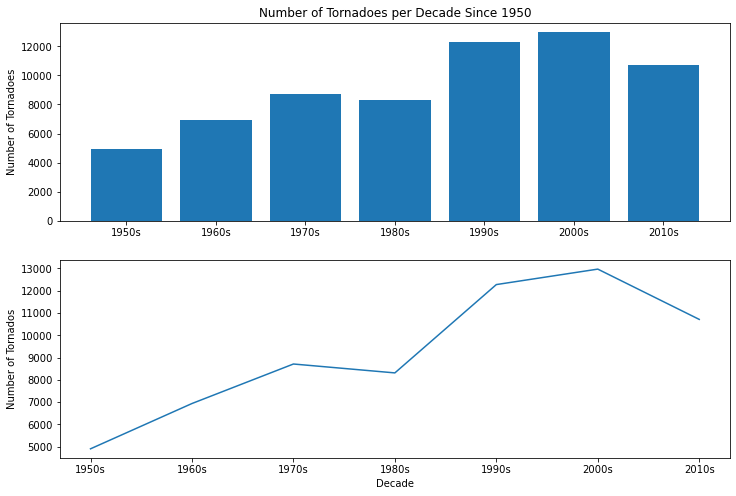

In [135]:
fig, ax_list = plt.subplots(2,1,figsize=(12,8))


ax_list[0].bar(tornado_decade["Decade"], tornado_decade["Number of Tornadoes"])   #make a bar plot of the data
ax_list[0].set_title("Number of Tornadoes per Decade Since 1950")
#ax_list[0].set_xlabel("Decade")
ax_list[0].set_ylabel("Number of Tornadoes")

ax_list[1].plot(tornado_decade["Decade"], tornado_decade["Number of Tornadoes"])  #make a line plot of the data
#ax_list[1].set_title("Number of Tornadoes per Decade Since 1950")
ax_list[1].set_xlabel("Decade")
ax_list[1].set_ylabel("Number of Tornados")

fig.show()


### Observation:  There certainly seems to be an increase in the number of tornadoes since the fifties!  The decrease in 2010s is promising.  If the overall increase is due to carbon emissions, perhaps regulations put in place in the 2000s is making an impact.

### Step 3:  See if there is an increase in the number of injuries and fatalaties over time

In [257]:
# Find the number of injuries and fatalities per decade  

inj_fat5=(tornado_df['inj'].loc[tornado_df['yr']<1960].sum(axis=0))+(tornado_df['fat'].loc[tornado_df['yr']<1960].sum(axis=0))
inj_fat6=(tornado_df['inj'].loc[(tornado_df['yr']>=1960)&(tornado_df['yr']<1970)].sum(axis=0)) + (tornado_df['fat'].loc[
    (tornado_df['yr']>=1960)&(tornado_df['yr']<1970)].sum(axis=0))
inj_fat7=(tornado_df['inj'].loc[(tornado_df['yr']>=1970)&(tornado_df['yr']<1980)].sum(axis=0)) + (tornado_df['fat'].loc[
    (tornado_df['yr']>=1970)&(tornado_df['yr']<1980)].sum(axis=0))
inj_fat8=(tornado_df['inj'].loc[(tornado_df['yr']>=1980)&(tornado_df['yr']<1990)].sum(axis=0)) + (tornado_df['fat'].loc[
    (tornado_df['yr']>=1980)&(tornado_df['yr']<1990)].sum(axis=0))
inj_fat9=(tornado_df['inj'].loc[(tornado_df['yr']>=1990)&(tornado_df['yr']<2000)].sum(axis=0)) + (tornado_df['fat'].loc[
    (tornado_df['yr']>=1990)&(tornado_df['yr']<2000)].sum(axis=0))
inj_fat0=(tornado_df['inj'].loc[(tornado_df['yr']>=2000)&(tornado_df['yr']<2010)].sum(axis=0)) + (tornado_df['fat'].loc[
    (tornado_df['yr']>=2000)&(tornado_df['yr']<2010)].sum(axis=0))
inj_fat1=(tornado_df['inj'].loc[(tornado_df['yr']>=2010)&(tornado_df['yr']<2020)].sum(axis=0)) + (tornado_df['fat'].loc[
    (tornado_df['yr']>=2010)&(tornado_df['yr']<2020)].sum(axis=0))

# Make a dictionary/change to df

d1={'Decade':['1950s', '1960s', '1970s', '1980s', '1990s','2000s','2010s'], 'Number of Injuries and Fatalities':[inj_fat5, inj_fat6, inj_fat7, inj_fat8, inj_fat9, inj_fat0, inj_fat1]}

tornado_injfat_decade = pd.DataFrame(data=d1)
tornado_injfat_decade


,Decade,Number of Injuries and Fatalities
0,1950s,18280
1,1960s,20174
2,1970s,27466
3,1980s,13497
4,1990s,12746
5,2000s,10076
6,2010s,12861


<ipython-input-258-4619a7138f37>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


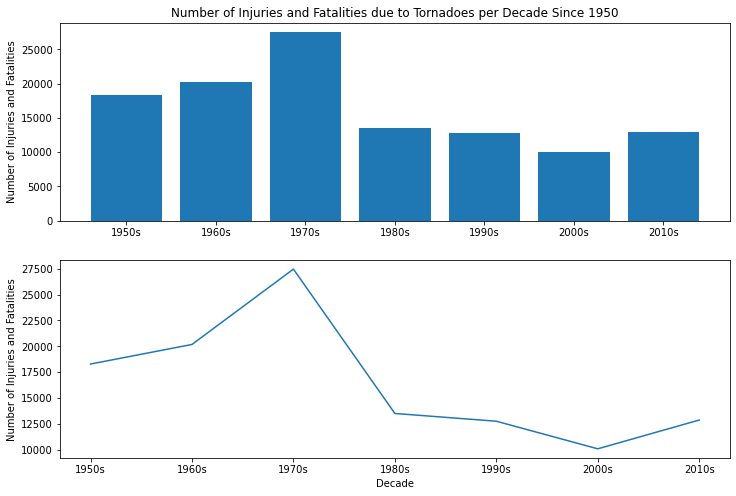

In [258]:
fig, ax_list = plt.subplots(2,1,figsize=(12,8))              #make a bar and line plot of injuries+fatalities


ax_list[0].bar(tornado_injfat_decade["Decade"], tornado_injfat_decade["Number of Injuries and Fatalities"])
ax_list[0].set_title("Number of Injuries and Fatalities due to Tornadoes per Decade Since 1950")
#ax_list[0].set_xlabel("Decade")
ax_list[0].set_ylabel("Number of Injuries and Fatalities")

ax_list[1].plot(tornado_injfat_decade["Decade"], tornado_injfat_decade["Number of Injuries and Fatalities"])
#ax_list[1].set_title("Number of Injuries and Fatalities per Decade Since 1950")
ax_list[1].set_xlabel("Decade")
ax_list[1].set_ylabel("Number of Injuries and Fatalities")

fig.show()

### Observation:  I wasn't expecting to see a decrease!  Perhaps we've gotten better at alerting and preparing for tornadoes.  So maybe this doesn't belong in my project.

### Step 4:  See if there is an increase in the severity of the tornadoes over time

In [242]:
# Find the average f-score per decade

mag_fif=tornado_df['mag'].loc[tornado_df['yr']<1960].mean(axis=0)
mag_six=tornado_df['mag'].loc[(tornado_df['yr']>=1960)&(tornado_df['yr']<1970)].mean(axis=0)
mag_sev=tornado_df['mag'].loc[(tornado_df['yr']>=1970)&(tornado_df['yr']<1980)].mean(axis=0)
mag_eig=tornado_df['mag'].loc[(tornado_df['yr']>=1980)&(tornado_df['yr']<1990)].mean(axis=0)
mag_nin=tornado_df['mag'].loc[(tornado_df['yr']>=1990)&(tornado_df['yr']<2000)].mean(axis=0)
mag_nau=tornado_df['mag'].loc[(tornado_df['yr']>=2000)&(tornado_df['yr']<2010)].mean(axis=0)
mag_ten=tornado_df['mag'].loc[(tornado_df['yr']>=2010)&(tornado_df['yr']<2020)].mean(axis=0)

# Make a dictionary/change to df

d2={'Decade':['1950s', '1960s', '1970s', '1980s', '1990s','2000s','2010s'], 'Average f-score (magnitude)':[
mag_fif, mag_six, mag_sev, mag_eig, mag_nin, mag_nau, mag_ten]}

tornado_mag_decade = pd.DataFrame(data=d2)
tornado_mag_decade


,Decade,Average f-score (magnitude)
0,1950s,1.341081
1,1960s,1.219948
2,1970s,1.115142
3,1980s,0.866819
4,1990s,0.576246
5,2000s,0.500386
6,2010s,0.532251


### Observation:  There is a decrease in the average magnitude of the tornadoes

### Step 5:  See if there is an increase in the length and width of the storms

In [259]:
# Find the average length of the storms in miles per decade

len_fif=tornado_df['len'].loc[tornado_df['yr']<1960].mean(axis=0)
len_six=tornado_df['len'].loc[(tornado_df['yr']>=1960)&(tornado_df['yr']<1970)].mean(axis=0)
len_sev=tornado_df['len'].loc[(tornado_df['yr']>=1970)&(tornado_df['yr']<1980)].mean(axis=0)
len_eig=tornado_df['len'].loc[(tornado_df['yr']>=1980)&(tornado_df['yr']<1990)].mean(axis=0)
len_nin=tornado_df['len'].loc[(tornado_df['yr']>=1990)&(tornado_df['yr']<2000)].mean(axis=0)
len_nau=tornado_df['len'].loc[(tornado_df['yr']>=2000)&(tornado_df['yr']<2010)].mean(axis=0)
len_ten=tornado_df['len'].loc[(tornado_df['yr']>=2010)&(tornado_df['yr']<2020)].mean(axis=0)

# Find the average width of the storms in miles per decade

wid_fif=tornado_df['wid'].loc[tornado_df['yr']<1960].mean(axis=0)
wid_six=tornado_df['wid'].loc[(tornado_df['yr']>=1960)&(tornado_df['yr']<1970)].mean(axis=0)
wid_sev=tornado_df['wid'].loc[(tornado_df['yr']>=1970)&(tornado_df['yr']<1980)].mean(axis=0)
wid_eig=tornado_df['wid'].loc[(tornado_df['yr']>=1980)&(tornado_df['yr']<1990)].mean(axis=0)
wid_nin=tornado_df['wid'].loc[(tornado_df['yr']>=1990)&(tornado_df['yr']<2000)].mean(axis=0)
wid_nau=tornado_df['wid'].loc[(tornado_df['yr']>=2000)&(tornado_df['yr']<2010)].mean(axis=0)
wid_ten=tornado_df['wid'].loc[(tornado_df['yr']>=2010)&(tornado_df['yr']<2020)].mean(axis=0)

# Make a dictionary/change to df

d3={'Decade':['1950s', '1960s', '1970s', '1980s', '1990s','2000s','2010s'], 'Average length in miles':[
len_fif, len_six, len_sev, len_eig, len_nin, len_nau, len_ten],'Average width in miles':[
    wid_fif, wid_six, wid_sev, wid_eig, wid_nin, wid_nau, wid_ten]}

tornado_size_decade = pd.DataFrame(data=d3)
tornado_size_decade


,Decade,Average length in miles,Average width in miles
0,1950s,6.013721,112.240775
1,1960s,4.430971,85.711300
2,1970s,4.245001,84.632189
3,1980s,3.105570,80.240014
4,1990s,2.618084,85.691838
5,2000s,3.012140,110.390594
6,2010s,3.739469,171.940259


<ipython-input-265-9bdef137e4c6>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-265-9bdef137e4c6>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-265-9bdef137e4c6>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-265-9bdef137e4c6>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


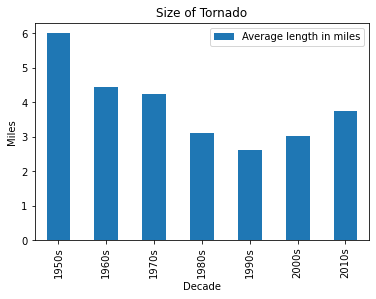

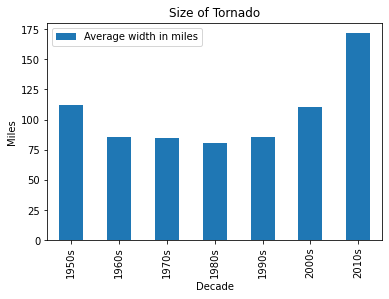

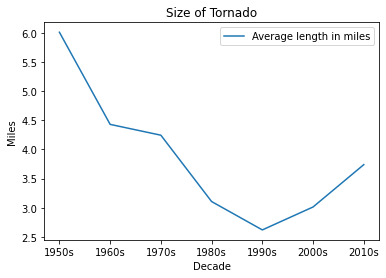

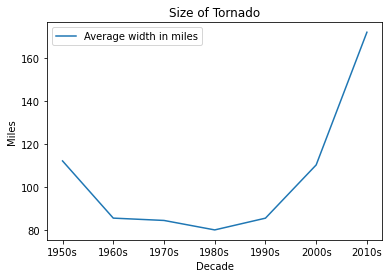

In [265]:
ax=tornado_size_decade.plot.bar("Decade","Average length in miles")           # make bar and line plots
ax.set_title("Size of Tornado")                                               # (make this 2x 2 plot)
ax.set_xlabel("Decade")
ax.set_ylabel("Miles")

fig.show()

ax=tornado_size_decade.plot.bar("Decade","Average width in miles")
ax.set_title("Size of Tornado")
ax.set_xlabel("Decade")
ax.set_ylabel("Miles")

fig.show()

ax=tornado_size_decade.plot("Decade","Average length in miles")
ax.set_title("Size of Tornado")
ax.set_xlabel("Decade")
ax.set_ylabel("Miles")

fig.show()

ax=tornado_size_decade.plot("Decade","Average width in miles")
ax.set_title("Size of Tornado")
ax.set_xlabel("Decade")
ax.set_ylabel("Miles")

fig.show()

### Observation:  After a decrease in size, there seems to be an increase since the 90s

In [267]:
# Find the total crop loss per decade  

closs_5=(tornado_df['closs'].loc[tornado_df['yr']<1960].sum(axis=0))
closs_6=(tornado_df['closs'].loc[(tornado_df['yr']>=1960)&(tornado_df['yr']<1970)].sum(axis=0)) 
closs_7=(tornado_df['closs'].loc[(tornado_df['yr']>=1970)&(tornado_df['yr']<1980)].sum(axis=0)) 
closs_8=(tornado_df['closs'].loc[(tornado_df['yr']>=1980)&(tornado_df['yr']<1990)].sum(axis=0)) 
closs_9=(tornado_df['closs'].loc[(tornado_df['yr']>=1990)&(tornado_df['yr']<2000)].sum(axis=0)) 
closs_0=(tornado_df['closs'].loc[(tornado_df['yr']>=2000)&(tornado_df['yr']<2010)].sum(axis=0))
closs_1=(tornado_df['closs'].loc[(tornado_df['yr']>=2010)&(tornado_df['yr']<2020)].sum(axis=0)) 

# Make a dictionary/change to df

d4={'Decade':['1950s', '1960s', '1970s', '1980s', '1990s','2000s','2010s'], 'Total Crop Loss in Millions of Dollars':[
    closs_5, closs_6, closs_7, closs_8, closs_9, closs_0, closs_1]}

tornado_closs_decade = pd.DataFrame(data=d4)
tornado_closs_decade


,Decade,Total Crop Loss in Millions of Dollars
0,1950s,0.000000e+00
1,1960s,0.000000e+00
2,1970s,0.000000e+00
3,1980s,0.000000e+00
4,1990s,0.000000e+00
5,2000s,4.714450e+01
6,2010s,2.237806e+07


### Observation:  Didn't realize there wasn't data on this until 2000.  Probably not worth keeping.

#  Part 2:  Temperature and Precipitation Analysis

##  Note:  Since starting, I have found new data for annual values for the US as a whole, since 1950, which I think will go better with the tornado data.  So I plan to maybe redo or add that to this part.  

## Source:  In order to compare densely vs. non-densely populated areas, I ordered yearly date for Baltimore and Savage River Dam, MD (Western MD) from NOAA.  https://www.ncdc.noaa.gov/cdo-web/confirmation

### Step 1:  Read in, get a feel for the data, and organize 

In [225]:
df2=pd.read_csv('2328476.csv')               # Read the precip and temp data file into python data frame

df2.shape                                    # Find number of rows/observations and columns/variables

(135, 17)

In [197]:
df2.head()                                   # Display first 5 rows

,STATION,NAME,DATE,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN
0,USC00188065,"SAVAGE RIVER DAM, MD US",1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.05,NaN,NaN,NaN,NaN
1,USC00188065,"SAVAGE RIVER DAM, MD US",1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.11,NaN,NaN,NaN,NaN
2,USC00188065,"SAVAGE RIVER DAM, MD US",1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.73,NaN,NaN,NaN,NaN
3,USC00188065,"SAVAGE RIVER DAM, MD US",1953,596.0,NaN,NaN,8.0,NaN,NaN,1.34,98.0,5615.0,31.67,NaN,51.4,63.9,38.9
4,USC00188065,"SAVAGE RIVER DAM, MD US",1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5710.0,NaN,NaN,NaN,NaN,NaN


In [198]:
df2.tail()                                   # Display last 5 rows

,STATION,NAME,DATE,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN
130,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2016,1512.0,14.0,4.0,8.0,26.0,25.5,2.61,100.0,4060.0,40.55,35.2,57.1,67.2,47.1
131,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2017,1285.0,8.0,2.0,8.0,2.0,2.8,2.58,98.0,3913.0,38.30,7.4,57.4,67.3,47.4
132,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2018,1579.0,7.0,5.0,1.0,4.0,4.7,4.79,99.0,4547.0,71.84,12.8,56.7,65.9,47.5
133,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2019,1716.0,10.0,5.0,5.0,5.0,4.8,1.74,100.0,4375.0,38.15,16.9,58.0,68.0,48.1
134,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3958.0,NaN,NaN,NaN,NaN,NaN


In [199]:
df.shape

(132, 17)

In [165]:
df2.tail()

,STATION,NAME,DATE,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN
127,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2016,1512.0,14.0,4.0,8.0,26.0,25.5,2.61,100.0,4060.0,40.55,35.2,57.1,67.2,47.1
128,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2017,1285.0,8.0,2.0,8.0,2.0,2.8,2.58,98.0,3913.0,38.30,7.4,57.4,67.3,47.4
129,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2018,1579.0,7.0,5.0,1.0,4.0,4.7,4.79,99.0,4547.0,71.84,12.8,56.7,65.9,47.5
130,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2019,1716.0,10.0,5.0,5.0,5.0,4.8,1.74,100.0,4375.0,38.15,16.9,58.0,68.0,48.1
131,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3958.0,NaN,NaN,NaN,NaN,NaN


In [200]:
for col in df2.columns: 
    print(col)

STATION
NAME
DATE
CDSD
DSND
DSNW
EMNT
EMSD
EMSN
EMXP
EMXT
HDSD
PRCP
SNOW
TAVG
TMAX
TMIN


### Important Fields

### After analyzing the documentation that accompany the data file, only the following variables will be kept:

1.  STATION  
2.  NAME  
3.  DATE:  year
4.  PRCP:  precipitation in ?
5.  SNOW:  snowfall in ?
6.  TAVG:  average temperature for the year
7.  TMIN:  min temp for the year
8.  TMAX:  max temp for the year


In [202]:
temp_precip_df=pd.read_csv('2328476.csv', usecols=['STATION','NAME','DATE','PRCP','SNOW','TAVG','TMIN','TMAX'])
temp_precip_df.head()

,STATION,NAME,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,USC00188065,"SAVAGE RIVER DAM, MD US",1950,38.05,NaN,NaN,NaN,NaN
1,USC00188065,"SAVAGE RIVER DAM, MD US",1951,41.11,NaN,NaN,NaN,NaN
2,USC00188065,"SAVAGE RIVER DAM, MD US",1952,38.73,NaN,NaN,NaN,NaN
3,USC00188065,"SAVAGE RIVER DAM, MD US",1953,31.67,NaN,51.4,63.9,38.9
4,USC00188065,"SAVAGE RIVER DAM, MD US",1954,NaN,NaN,NaN,NaN,NaN


In [203]:
# Change "date" to "year"

temp_precip_df1=temp_precip_df.rename(columns={'DATE':'YEAR'})  
temp_precip_df1.head()


,STATION,NAME,YEAR,PRCP,SNOW,TAVG,TMAX,TMIN
0,USC00188065,"SAVAGE RIVER DAM, MD US",1950,38.05,NaN,NaN,NaN,NaN
1,USC00188065,"SAVAGE RIVER DAM, MD US",1951,41.11,NaN,NaN,NaN,NaN
2,USC00188065,"SAVAGE RIVER DAM, MD US",1952,38.73,NaN,NaN,NaN,NaN
3,USC00188065,"SAVAGE RIVER DAM, MD US",1953,31.67,NaN,51.4,63.9,38.9
4,USC00188065,"SAVAGE RIVER DAM, MD US",1954,NaN,NaN,NaN,NaN,NaN


In [205]:
# Make a baltimore only df

baltimore_df=temp_precip_df1[64:]                    
baltimore_df.head()

,STATION,NAME,YEAR,PRCP,SNOW,TAVG,TMAX,TMIN
64,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",1950,38.51,3.7,55.2,64.0,46.4
65,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",1951,45.83,8.6,55.5,65.6,45.4
66,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",1952,56.60,14.4,56.0,65.7,46.2
67,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",1953,48.27,11.9,57.0,67.4,46.6
68,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",1954,27.91,16.6,55.3,65.6,45.0


### Step 2:  Visualize Baltimore rainfall and temperature data

<ipython-input-268-a0e5e2a6c006>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


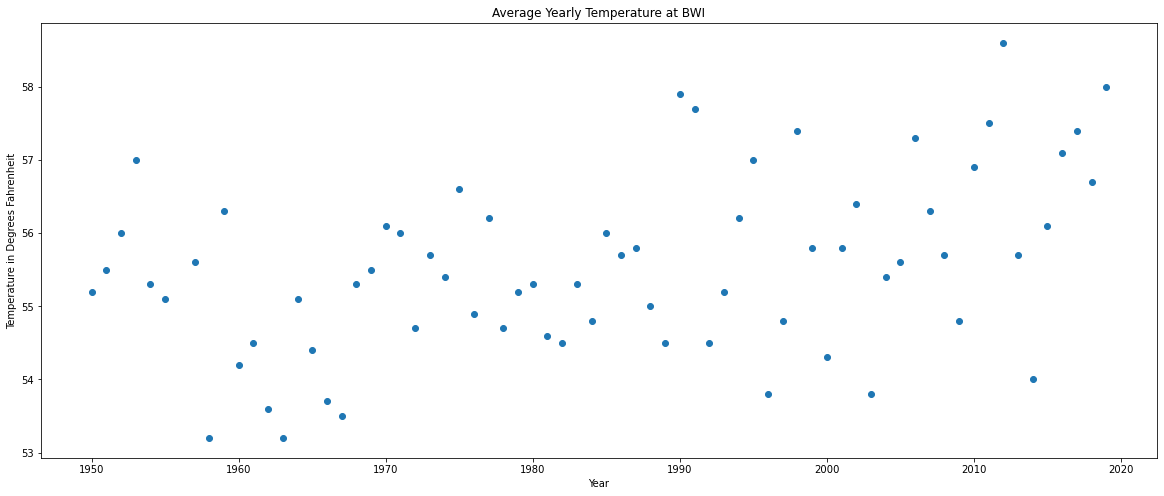

In [268]:
fig, ax_list = plt.subplots(figsize=(20,8))                            # Make a scatter plot of the baltimore avg temp



ax_list.scatter(baltimore_df["YEAR"], baltimore_df["TAVG"])
ax_list.set_title("Average Yearly Temperature at BWI")
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Temperature in Degrees Fahrenheit")

#m, b = np.polyfit(baltimore_df["YEAR"], baltimore_df["TAVG"], 1)     # Can't get this to work
#plt.plot(x, m*x + b)
fig.show()

<ipython-input-207-d17ced1bbff2>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


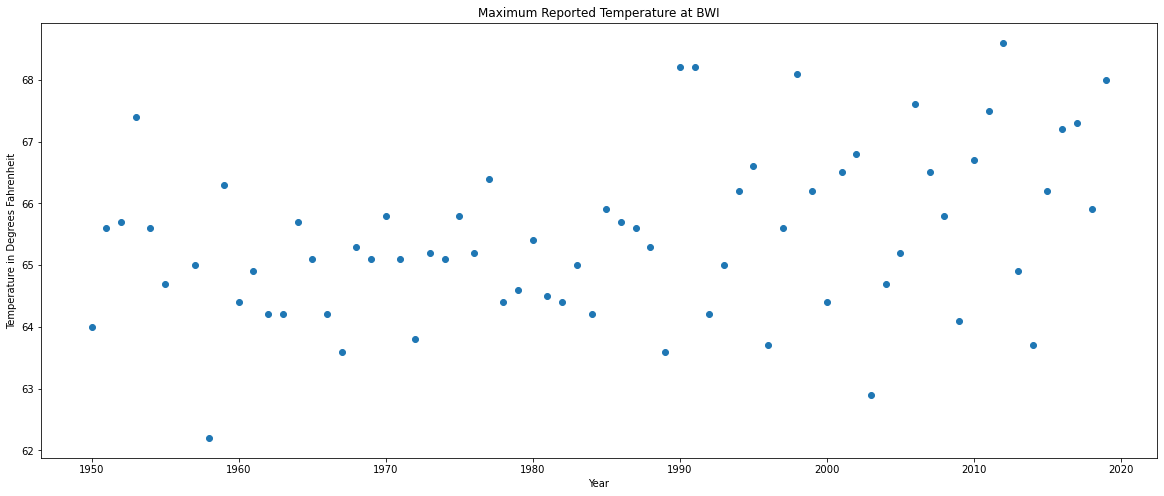

In [207]:
fig, ax_list = plt.subplots(figsize=(20,8))                              # Make a scatter plot of the baltimore max temp



ax_list.scatter(baltimore_df["YEAR"], baltimore_df["TMAX"])
ax_list.set_title("Maximum Reported Temperature at BWI")
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Temperature in Degrees Fahrenheit")

fig.show()

<ipython-input-191-16e25a0cb990>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


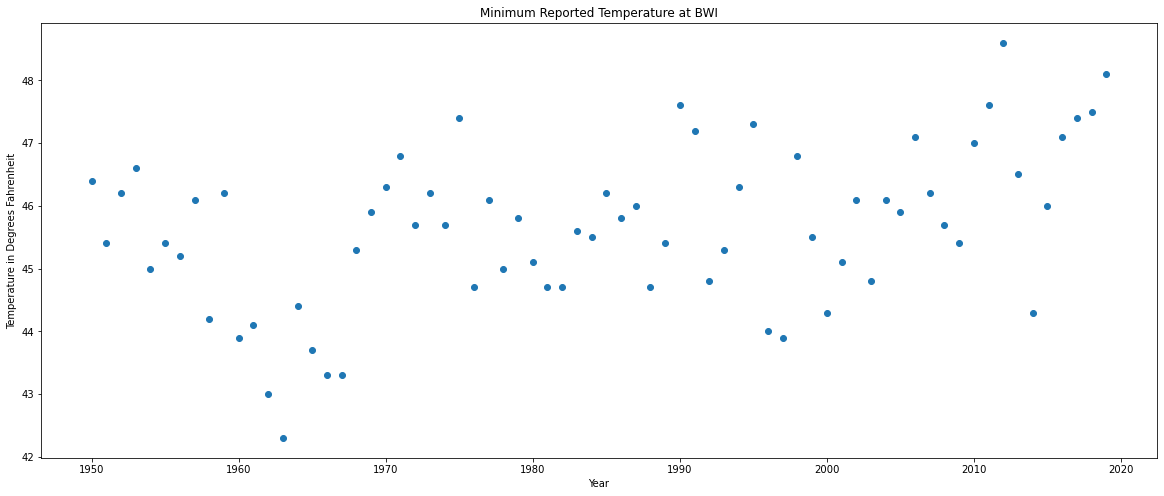

In [191]:
fig, ax_list = plt.subplots(figsize=(20,8))                            # Make a scatter plot of the baltimore min temp



ax_list.scatter(baltimore_df["YEAR"], baltimore_df["TMIN"])
ax_list.set_title("Minimum Reported Temperature at BWI")
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Temperature in Degrees Fahrenheit")

fig.show()

<ipython-input-269-66913b618519>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


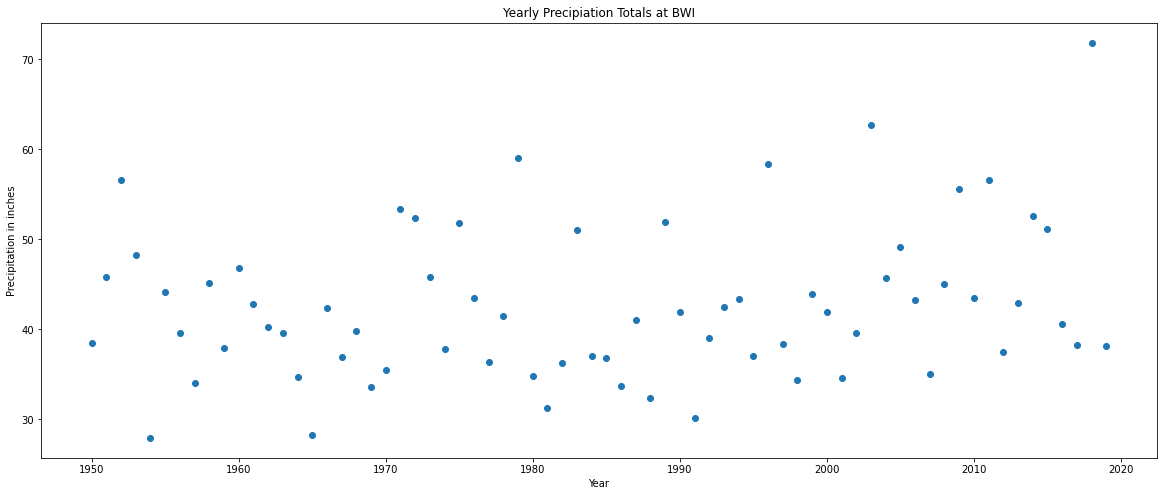

In [269]:
fig, ax_list = plt.subplots(figsize=(20,8))                           # Make a scatter plot of the baltimore precip



ax_list.scatter(baltimore_df["YEAR"], baltimore_df["PRCP"])
ax_list.set_title("Yearly Precipiation Totals at BWI")
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Precipitation in inches")

fig.show()

### Observation:  There does seem to be an upward trend for Baltimore's precipitation and temperature data over time.  Trying to figure out how to add lines of best fit.

### Step 2:  Visualize Western, MD rainfall and temperature data

In [208]:
savage_df=temp_precip_df1[:63]               # Make a df of just Savage River Dam, MD data
savage_df.head()


,STATION,NAME,YEAR,PRCP,SNOW,TAVG,TMAX,TMIN
0,USC00188065,"SAVAGE RIVER DAM, MD US",1950,38.05,NaN,NaN,NaN,NaN
1,USC00188065,"SAVAGE RIVER DAM, MD US",1951,41.11,NaN,NaN,NaN,NaN
2,USC00188065,"SAVAGE RIVER DAM, MD US",1952,38.73,NaN,NaN,NaN,NaN
3,USC00188065,"SAVAGE RIVER DAM, MD US",1953,31.67,NaN,51.4,63.9,38.9
4,USC00188065,"SAVAGE RIVER DAM, MD US",1954,NaN,NaN,NaN,NaN,NaN


<ipython-input-209-c7d09035149a>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


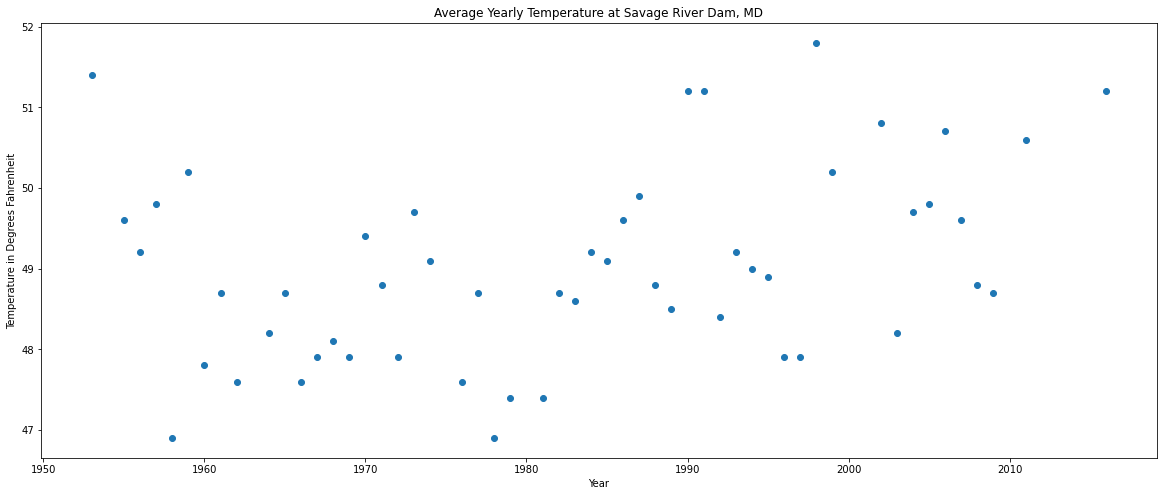

In [209]:
fig, ax_list = plt.subplots(figsize=(20,8))      # Make a scatter plot of average temps for Savage River Dam, MD



ax_list.scatter(savage_df["YEAR"], savage_df["TAVG"])
ax_list.set_title("Average Yearly Temperature at Savage River Dam, MD")
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Temperature in Degrees Fahrenheit")

fig.show()

<ipython-input-210-fc489628a3a2>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


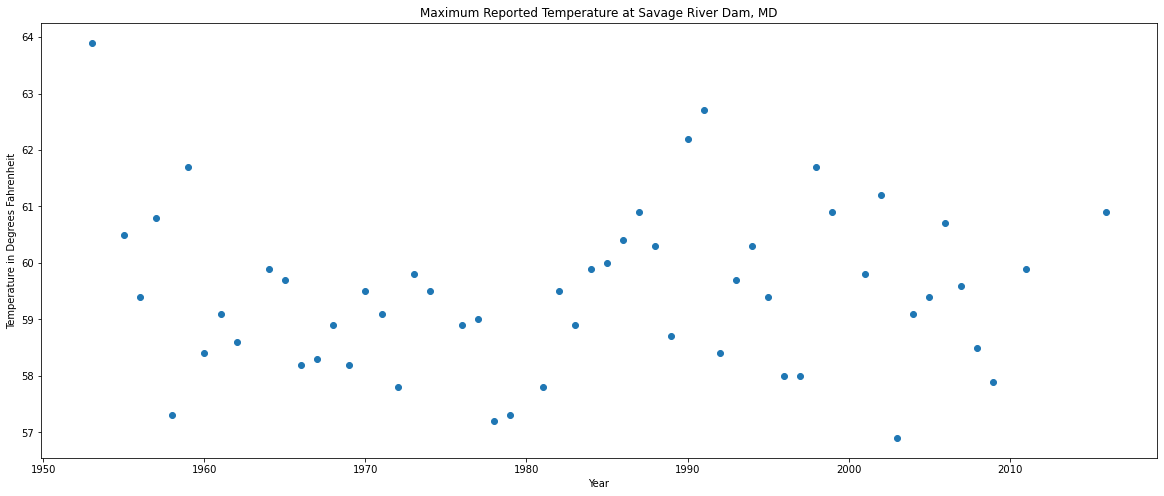

In [210]:
fig, ax_list = plt.subplots(figsize=(20,8))                  # Make a scatter plot of max temps for Savage River Dam, MD



ax_list.scatter(savage_df["YEAR"], savage_df["TMAX"])
ax_list.set_title("Maximum Reported Temperature at Savage River Dam, MD")
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Temperature in Degrees Fahrenheit")

fig.show()

<ipython-input-194-872312dc3b5f>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


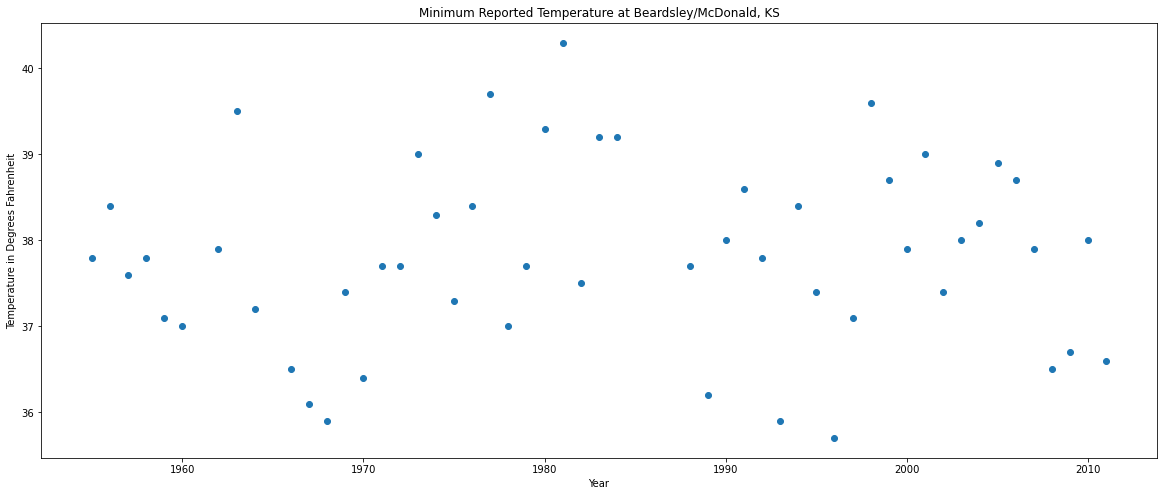

In [194]:
fig, ax_list = plt.subplots(figsize=(20,8))              # Make a scatter plot of min temps for Savage River Dam, MD



ax_list.scatter(savage_df["YEAR"], savage_df["TMIN"])
ax_list.set_title("Minimum Reported Temperature at Savage River Dam, MD")
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Temperature in Degrees Fahrenheit")

fig.show()

<ipython-input-270-edc024fb9005>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


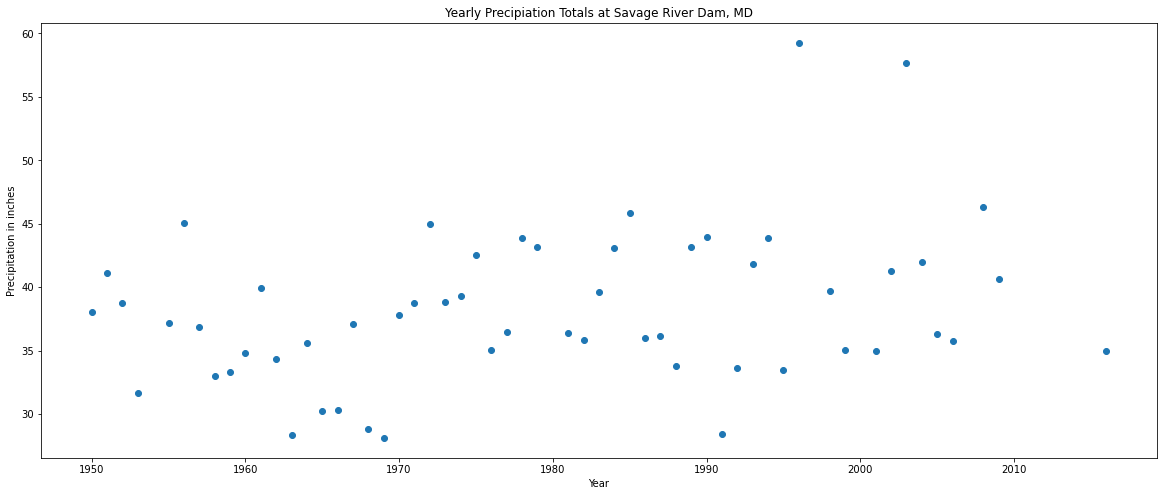

In [270]:
fig, ax_list = plt.subplots(figsize=(20,8))                # Make a scatter plot of the Savage River Dam, MD precip



ax_list.scatter(savage_df["YEAR"], savage_df["PRCP"])
ax_list.set_title("Yearly Precipiation Totals at Savage River Dam, MD")
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Precipitation in inches")

fig.show()

### Observation:  Not really sure I see an upward trend as clearly as with Baltimore, so mabye population density does play a role.  Would like to add best fit lines here too.